# World Wonders Identifier

## Jorge Alberto Padilla Gutierrez

# Imports

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
from collections import Counter

# Data import

Samples:  5519
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (64x64)world wonder images in rgb
Labels: ['Alhambra' 'Amundsen-Scott Research Station' 'Angkor Wat' 'Apadana'
 'Big Ben' 'Biosphere de Montreal' 'Bolshoi Theatre' 'Broadway'
 'Casa de Contratacion' 'Chichen Itza' 'Christ the Redeemer' 'Colosseum'
 'Colossus of Rhodes' 'Eiffel Tower' 'El Angel de la Independencia'
 'El Palacio de las Bellas Artes' 'Estadio do Maracana' 'Etemenaki'
 'Forbidden City' 'Golden Gate Bridge' 'Great Library of Alexandria'
 'Great Pyramid of Giza' 'Great Wall of China' 'Great Zimbabwe'
 'Greath Bath' 'Hagia Sophia' 'Hanging Gardens of Babylon' 'Hermitage'
 'Huey Teocalli' 'Jebel Barkal' 'Kilwa Kisiwani' 'Kotokou-in'
 'Leaning Tower of Pisa' 'Lighthouse of Alexandria' 'Machu Picchu'
 'Mahabodhi Temple' 'Mausoleum at Halicarnassus' 'Meenakshi Temple'
 'Mont St. Michel' 'Oracle of Delphi' 'Orszaghaz' 'Oxford University'
 'Panama Canal' 'Petra' 'Potala Palace' 'Ruhr Valley'
 '

C:\Users\japadill\AppData\Local\Temp\ipykernel_9984\3765743334.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


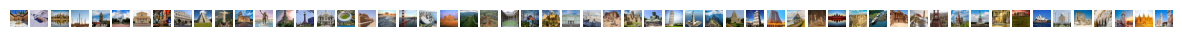

In [2]:
data = joblib.load(fr'{os.path.abspath(os.getcwd())}\..\data\processed\World_Wonders_64x64.pkl')
print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Labels:', np.unique(data['label']))
print(Counter(data['label']))
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    # ax.set_title(label)

# Feature Engineering

In [3]:
X = np.array(data['data'], dtype=object)
print(X)
print(X.shape)

[[[[31 95 194]
   [33 96 198]
   [33 97 199]
   ...
   [126 91 79]
   [46 18 10]
   [86 54 36]]

  [[35 100 201]
   [36 100 203]
   [35 99 202]
   ...
   [61 28 17]
   [33 11 7]
   [111 67 44]]

  [[38 106 205]
   [38 103 205]
   [37 101 203]
   ...
   [24 6 3]
   [85 45 28]
   [186 121 83]]

  ...

  [[216 230 238]
   [222 235 242]
   [208 223 231]
   ...
   [213 229 238]
   [203 219 231]
   [194 212 226]]

  [[203 221 232]
   [216 229 238]
   [222 234 242]
   ...
   [212 228 237]
   [193 212 228]
   [175 198 218]]

  [[197 217 228]
   [216 230 238]
   [220 234 242]
   ...
   [195 216 231]
   [187 209 227]
   [167 190 212]]]


 [[[167 198 242]
   [167 198 242]
   [167 198 243]
   ...
   [183 204 244]
   [183 204 244]
   [185 204 244]]

  [[170 200 244]
   [169 199 243]
   [167 200 243]
   ...
   [183 206 244]
   [186 205 245]
   [183 205 244]]

  [[173 202 244]
   [173 202 244]
   [172 201 244]
   ...
   [185 207 244]
   [187 207 245]
   [187 207 245]]

  ...

  [[49 61 58]
   [81 91 

In [4]:
# Need to do 1 dimention for X
X = np.reshape(X, (len(X), -1, ))
print(X)
print(X.shape)

[[31 95 194 ... 167 190 212]
 [167 198 242 ... 68 67 58]
 [22 22 18 ... 26 38 2]
 ...
 [71 116 201 ... 15 119 174]
 [54 117 177 ... 15 119 174]
 [164 214 240 ... 15 119 174]]
(5519, 12288)


In [5]:
le = preprocessing.LabelEncoder()
le.fit(data['label'])
y = np.array(le.transform(data['label']))
print(y)
print(y.shape)

[ 0  0  0 ... 56 56 56]
(5519,)


# Algorithm

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [11]:
parameters = {
    'n_neighbors':[31,37,41,43,47,53,59,61,67,71,73,79]
}

model = KNeighborsClassifier()
grid = GridSearchCV(model, parameters, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [31, 37, 41, 43, 47, 53, 59, 61, 67, 71,
                                         73, 79]})

In [17]:
model = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
print(accuracy_score(y_test, pred))

0.12771739130434784


In [28]:
parameters_log = {
    'penalty':[None, 'l2'],
    'solver':['lbfgs', 'newton-cg', 'sag', 'saga']
}

model_log = LogisticRegression()
grid_log = GridSearchCV(model_log, parameters_log, n_jobs=-1)
grid_log.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
model_log = LogisticRegression(penalty='l2', n_jobs=-1)
model_log.fit(X_train, y_train)
pred_log = model_log.predict(X_test)
pred_proba_log = model_log.predict_proba(X_test)
print(accuracy_score(y_test, pred_log))

0.2826086956521739


# Experiments

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_Surprise = pca.fit_transform(X)
X_Surprise.shape

(5519, 2)

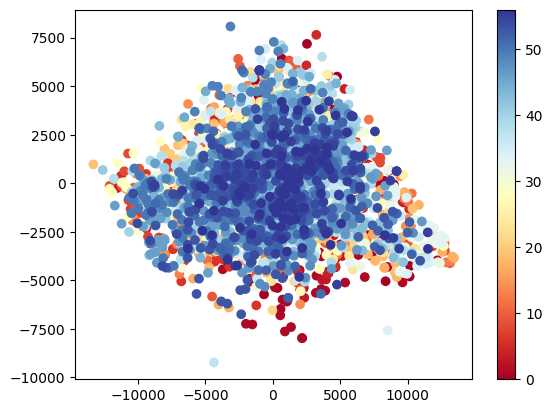

In [8]:
plt.scatter(X_Surprise[:, 0], X_Surprise[:, 1], c=y, cmap='RdYlBu')
plt.colorbar()

In [21]:
X_Surprise_train, X_Surprise_test, y_Surprise_train, y_Surprise_test = train_test_split(X_Surprise, y, test_size=0.2, shuffle=True, random_state=42)

model_pca = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_pca.fit(X_Surprise_train, y_Surprise_train)
pred_pca = model_pca.predict(X_Surprise_test)
pred_proba_pca = model_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_pca))

0.057971014492753624


In [26]:
model_log_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_log_pca.fit(X_Surprise_train, y_Surprise_train)
pred_log_pca = model_log_pca.predict(X_Surprise_test)
pred_proba_log_pca = model_log_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_log_pca))

0.044384057971014496
